In [ ]:
#!pip install imblearn

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
train_df = pd.read_csv("NBA Training Data.csv")
test_df = pd.read_csv("NBA Testing Data.csv")

In [ ]:
train_df['TOP 4'] = [1 if i == "Yes" else 0 for i in train_df['TOP 4']]
test_df['TOP 4'] = [1 if i == "Yes" else 0 for i in test_df['TOP 4']]

In [ ]:
y_train = train_df['TOP 4']
y_test = test_df['TOP 4']

In [ ]:
x_train = train_df.drop(['TEAM', 'SEASON','CONFERENCE','TOP 4', 'TOP 8'], axis = 1)
x_test = test_df.drop(['TEAM', 'SEASON', 'CONFERENCE', 'TOP 4', 'TOP 8'], axis = 1)

In [ ]:
df_final_test = pd.read_csv("NBA Testing Data.csv")
df_final_test.drop(["TEAM", "SEASON", "CONFERENCE", "TOP 8"], axis = 1, inplace = True)
df_final_test['TOP 4'] = [1 if i == "Yes" else 0 for i in df_final_test['TOP 4']]
x_final_test = df_final_test.drop(["TOP 4"], axis = 1)
y_final_test = df_final_test["TOP 4"]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

# 1 Season vs 10 Season

### Benchmark - Liblinear

In [ ]:
# Apply logistic regression model to training data
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred = model.predict(x_test)

print("           Training vs   Test vs  F1 Score")
print("Liblinear | {:.4f}  |  {:.4f}  |  {:.4f}".format(model.score(x_train, y_train), model.score(x_test, y_test), f1_score(y_test, y_pred, average="weighted")))

           Training vs   Test vs  F1 Score
Liblinear | 0.9100  |  0.8333  |  0.8230


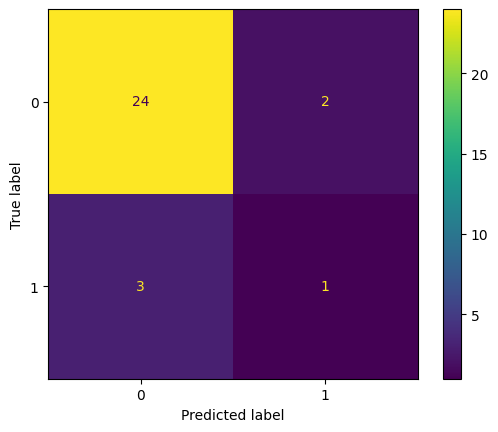

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Hyperparameter Tuning - Regularization L1(Lasso) + GridSearchCV

In [ ]:
parameters = [{'penalty':['l1']}, 
              {'C':[0.01, 0.1, 10, 100]}]


grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l1']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8967


Parameters that give the best results : 

 {'C': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01, random_state=42, solver='liblinear')


### L1 aka Lasso Regression | C = 0.01 | RandomState = 42

In [ ]:
model1 = LogisticRegression(penalty='l1',C = 0.01,random_state = 42, solver = 'liblinear')
model1.fit(x_train, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
y_pred1 = model1.predict(x_test)
print("           Training vs   Test vs  F1 Score")
print("Liblinear | {:.4f}  |  {:.4f}  |  {:.4f}".format(model1.score(x_train, y_train), model1.score(x_test, y_test), f1_score(y_test,y_pred1, average="weighted")))

           Training vs   Test vs  F1 Score
Liblinear | 0.8833  |  0.8667  |  0.8048


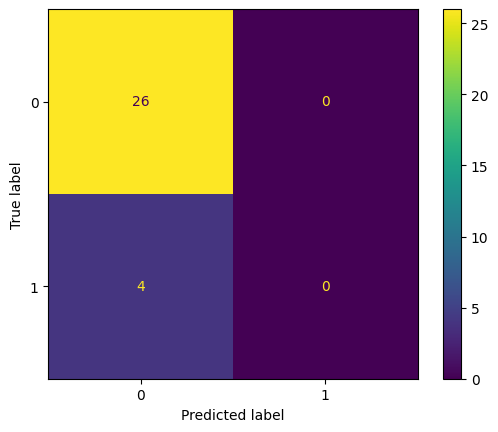

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred1, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### L1 aka Lasso Regression | C = 1 | RandomState = 42

In [ ]:
model2 = LogisticRegression(penalty='l1',C = 1,random_state = 42, solver = 'liblinear')
model2.fit(x_train, y_train)

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
y_pred2 = model2.predict(x_test)
print("           Training vs   Test vs  F1 Score")
print("Liblinear | {:.4f}  |  {:.4f}  |  {:.4f}".format(model2.score(x_train, y_train), model2.score(x_test, y_test), f1_score(y_test, y_pred2, average="weighted")))

           Training vs   Test vs  F1 Score
Liblinear | 0.9167  |  0.8333  |  0.8230


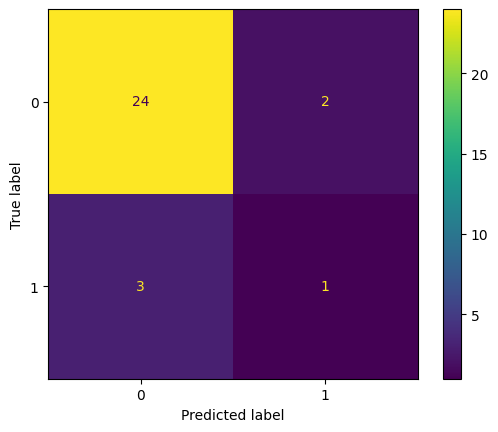

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred2, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### GridSearchCV with CrossValidation - Penalty: L2

In [ ]:
parameters = [{'penalty':['l2']}, 
              {'C':[0.01, 0.1, 10, 100]}]


grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l2']}, {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8967


Parameters that give the best results : 

 {'C': 0.01}


Estimator that was chosen by the search : 

 LogisticRegression(C=0.01, random_state=42, solver='liblinear')


### L2 aka Ridge Regression | C = 0.01 | RandomState = 42

In [ ]:
model3 = LogisticRegression(penalty='l2',C = 0.01,random_state = 42, solver = 'liblinear')
model3.fit(x_train, y_train)

LogisticRegression(C=0.01, random_state=42, solver='liblinear')

In [ ]:
y_pred3 = model3.predict(x_test)
print("           Training vs   Test vs  F1 Score")
print("Liblinear | {:.4f}  |  {:.4f}  |  {:.4f}".format(model3.score(x_train, y_train), model3.score(x_test, y_test), f1_score(y_test, y_pred3, average="weighted")))

           Training vs   Test vs  F1 Score
Liblinear | 0.9067  |  0.8667  |  0.8469


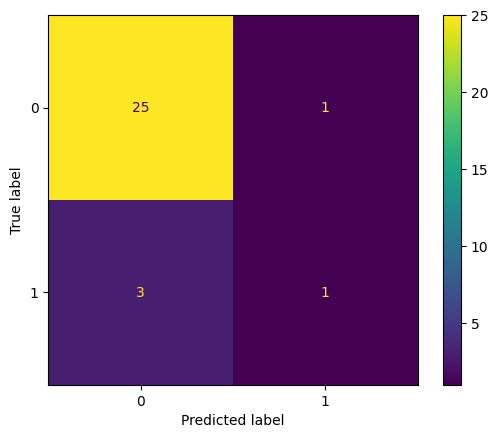

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred3, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### L2 aka Ridge Regression | C = 1 | RandomState = 42

In [ ]:
model4 = LogisticRegression(penalty='l2',C = 1,random_state = 42, solver = 'liblinear')
model4.fit(x_train, y_train)

LogisticRegression(C=1, random_state=42, solver='liblinear')

In [ ]:
y_pred4 = model4.predict(x_test)
print("           Training vs   Test vs  F1 Score")
print("Liblinear | {:.4f}  |  {:.4f}  |  {:.4f}".format(model4.score(x_train, y_train), model4.score(x_test, y_test), f1_score(y_test, y_pred4, average="weighted")))

           Training vs   Test vs  F1 Score
Liblinear | 0.9100  |  0.8333  |  0.8230


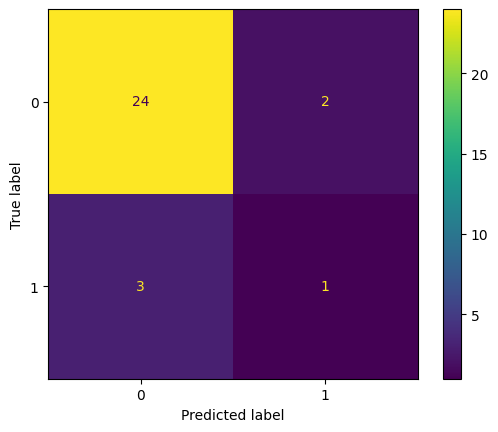

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred4, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

# 70:30

In [ ]:
df = pd.read_csv("NBA Dataset.csv")
df['TOP 4'] = [1 if i == "Yes" else 0 for i in df['TOP 4']]

In [ ]:
def tune_logistic_regression(isStandardized, params, isSMOTE, RFE_enabled, isFeatureSelection, X_train, y_train):
    # Choose logistic regression with specified regularization
    lr = LogisticRegression(random_state=42)
    # if regularization == 'lasso':
    #     lr = LogisticRegression(penalty='l1', solver='liblinear')
    # elif regularization == 'ridge':
    #     lr = LogisticRegression(penalty='l2', solver='liblinear')
    # else:
    #     lr = LogisticRegression()
    df_final_test = pd.read_csv("NBA Testing Data.csv")
    df_final_test.drop(["TEAM", "SEASON", "CONFERENCE", "TOP 8"], axis = 1, inplace = True)
    df_final_test['TOP 4'] = [1 if i == "Yes" else 0 for i in df_final_test['TOP 4']]
    x_final_test = df_final_test.drop(["TOP 4"], axis = 1)
    y_final_test = df_final_test["TOP 4"]
    if isFeatureSelection:
        X_train = X_train[['W', 'L', 'WIN%', 'FG%', '3P%', 'BLKA', '+/-']]
        x_final_test = x_final_test[['W', 'L', 'WIN%', 'FG%', '3P%', 'BLKA', '+/-']]

    # Create pipeline steps
    steps = []
    if isStandardized:
        steps.append(('standardize', StandardScaler()))
    if isSMOTE:
        steps.append(('smote', SMOTE(random_state=42)))
    if RFE_enabled:
        steps.append(('rfe', RFE(estimator=LogisticRegression())))
    steps.append(('logistic_regression', lr))

    # Create pipeline
    if isSMOTE:
        pipeline = ImbPipeline(steps)
    else:
        pipeline = Pipeline(steps)

    # GridSearchCV
    grid = GridSearchCV(pipeline, param_grid=params, cv=10, scoring='f1_micro', n_jobs=-1)
    grid.fit(X_train, y_train)

    # Results
    for i, (params, score) in enumerate(zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score'])):
        print(f"Model {i+1}: {params} - AUC: {score:.4f}")

        # Refit model with these parameters on full training data
        model = grid.best_estimator_
        model.set_params(**params)
        model.fit(X_train, y_train)

        # Prediction probabilities
        y_pred = model.predict(x_final_test)

        # Print other metrics
        print(f"F1 Score: {f1_score(y_final_test, y_pred)}")
        print(f"Training Accuracy: {model.score(x_train, y_train)}")
        print(classification_report(y_final_test, y_pred))
        
        # Plot ROC Curve
        # plot_roc_curve(model, X_train, y_train)
        # plt.show()

    return grid

# Example usage
# params = {'logistic_regression__C': [0.01, 0.1, 1, 10, 100]}
# best_model = tune_logistic_regression(True, 'lasso', params, False, True, 0.5, X_train, y_train)

In [ ]:
def print_best_result_final(grid):
    print(grid.best_estimator_)
    print(grid.best_params_)

    model = grid.best_estimator_
    model.set_params(**grid.best_params_)
    model.fit(x_train, y_train)

    # Prediction probabilities
    y_pred = model.predict(x_final_test)

    # Print other metrics
    print(f"F1 Score: {f1_score(y_final_test, y_pred)}")
    print(f"training acc: {model.score(x_train, y_train)}")
    print(classification_report(y_final_test, y_pred))

    labels = [0,1]
    cm = confusion_matrix(y_final_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()

In [ ]:
def print_best_result(grid):
    print(grid.best_estimator_)
    print(grid.best_params_)

    model = grid.best_estimator_
    model.set_params(**grid.best_params_)
    model.fit(x_train, y_train)

    # Prediction probabilities
    y_proba = model.predict_proba(x_train)[:, 1]
    y_pred = (y_proba >= 0.4).astype(int)

    # Print other metrics
    print(f"F1 Score: {f1_score(y_train, y_pred)}")
    print(classification_report(y_train, y_pred))

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state= 42)
x_train = train_df.drop(['TOP 4'], axis = 1)
y_train = train_df['TOP 4']
x_test = test_df.drop(['TOP 4'], axis = 1)
y_test = test_df['TOP 4']

## Benchmark

In [ ]:
# Apply logistic regression model to training data
model5 = LogisticRegression(solver='liblinear', random_state=42)
model5.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred5 = model5.predict(x_test)
# print("           Training vs   Test vs  F1 Score")
# print("Liblinear | {:.4f}  |  {:.4f}  |  {:.4f}".format(model5.score(x_train, y_train), model5.score(x_test, y_test), f1_score(y_pred5, y_test, average="weighted")))
print("\nClassification Report:\n", classification_report(y_test, y_pred5))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94        83
           1       0.38      0.71      0.50         7

    accuracy                           0.89        90
   macro avg       0.68      0.81      0.72        90
weighted avg       0.93      0.89      0.90        90



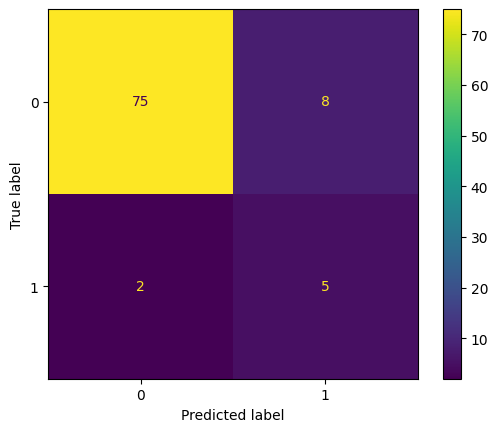

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test, y_pred5, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

### Final Test

F1 Score = 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.50      0.50      0.50         4

    accuracy                           0.87        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.87      0.87      0.87        30



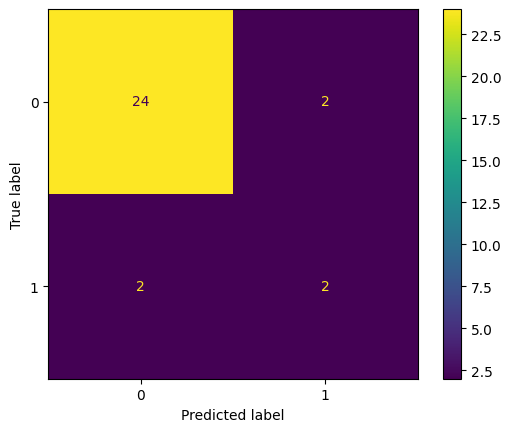

In [ ]:
y_pred6 = model5.predict(x_final_test)

labels = [0,1]
cm = confusion_matrix(y_final_test, y_pred6, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print("F1 Score = {}".format(f1_score(y_final_test,y_pred6, average="weighted")))
print("\nClassification Report:\n", classification_report(y_final_test, y_pred6))

In [ ]:
model5.score(x_train, y_train)

0.9142857142857143

## GridSearchCV Raw Data

In [ ]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':[0.01, 0.1, 10, 100]}]

grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)

# performing grid search on the training data set
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'C': [0.01, 0.1, 10, 100]}],
             scoring='accuracy')

### Final Test

LogisticRegression(random_state=42, solver='liblinear')
{'penalty': 'l2'}
F1 Score: 0.5
training acc: 0.9142857142857143
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.50      0.50      0.50         4

    accuracy                           0.87        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.87      0.87      0.87        30



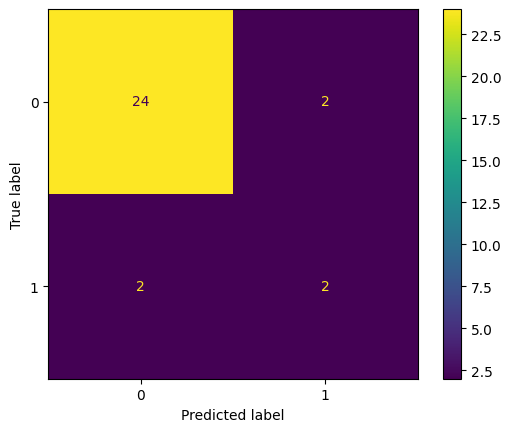

In [ ]:
print_best_result_final(grid_search)

In [ ]:
grid_search.score(x_train, y_train)

0.9142857142857143

## SMOTE

In [ ]:
best_models = {}

In [ ]:
smote_grid = tune_logistic_regression(
    isStandardized=False, 
    params=[{'logistic_regression__solver':['liblinear'],
    'logistic_regression__penalty':['l1','l2'], 
    'logistic_regression__C':[0.01, 0.1, 1, 10]}], 
    isSMOTE = True, 
    RFE_enabled = False, 
    isFeatureSelection = False, 
    X_train=x_train, 
    y_train=y_train)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: Conv

### Final Test

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('logistic_regression',
                 LogisticRegression(C=10, random_state=42,
                                    solver='liblinear'))])
{'logistic_regression__C': 10, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
F1 Score: 0.5
training acc: 0.9523809523809523
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.50      0.50      0.50         4

    accuracy                           0.87        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.87      0.87      0.87        30



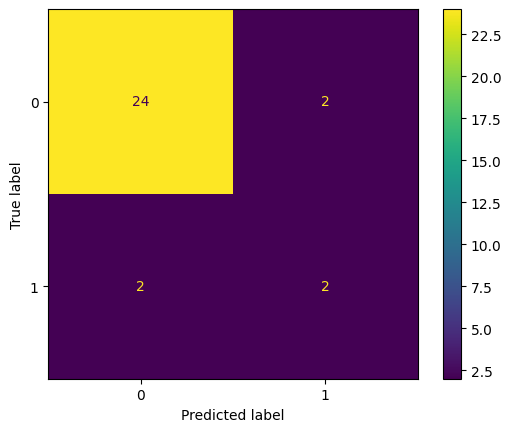

In [ ]:
print_best_result_final(smote_grid)

F1 Score = 0.8230008984725966

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.33      0.25      0.29         4

    accuracy                           0.83        30
   macro avg       0.61      0.59      0.60        30
weighted avg       0.81      0.83      0.82        30



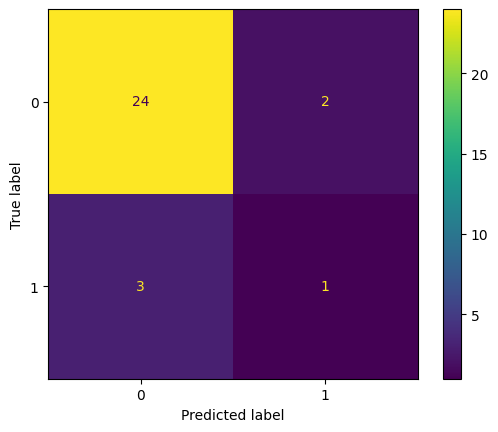

In [ ]:
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE
    ('logistic_regression', LogisticRegression(C=0.1, penalty='l1', solver='liblinear',random_state=42))  # Logistic regression
])
#{'logistic_regression__C': 0.1, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'}

# Train the model
pipeline.fit(x_train, y_train)

# Make predictions
y_pred7 = pipeline.predict(x_final_test)

labels = [0,1]
cm = confusion_matrix(y_final_test, y_pred7, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
print("F1 Score = {}".format(f1_score(y_final_test,y_pred7, average="weighted")))
print("\nClassification Report:\n", classification_report(y_final_test, y_pred7))

## Standardized

In [ ]:
standardized_grid = tune_logistic_regression(
    isStandardized=True, 
    params=[{'logistic_regression__solver':['liblinear'],
    'logistic_regression__penalty':['l1','l2'], 
    'logistic_regression__C':[0.01, 0.1, 1, 10]}], 
    isSMOTE = False, 
    RFE_enabled = False, 
    isFeatureSelection = False, 
    X_train=x_train, 
    y_train=y_train)

Model 1: {'logistic_regression__C': 0.01, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'} - AUC: 0.8429
F1 Score: 0.0
Training Accuracy: 0.8428571428571429
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       0.00      0.00      0.00         4

    accuracy                           0.87        30
   macro avg       0.43      0.50      0.46        30
weighted avg       0.75      0.87      0.80        30

Model 2: {'logistic_regression__C': 0.01, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'liblinear'} - AUC: 0.8333
F1 Score: 0.36363636363636365
Training Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.29      0.50      0.36         4

    accuracy                           0.77        30
   macro avg       0.60      0.65      0.61        30
weigh

### Final Test

In [ ]:
#print_best_result_final(best_models["Standardized"])

## Feature Selection

In [ ]:
feature_selection_grid = tune_logistic_regression(
    isStandardized=False, 
    params=[{'logistic_regression__solver':['liblinear'],
    'logistic_regression__penalty':['l1','l2'], 
    'logistic_regression__C':[0.01, 0.1, 1, 10]}], 
    isSMOTE = False, 
    RFE_enabled = False, 
    isFeatureSelection = True, 
    X_train=x_train, 
    y_train=y_train)

Model 1: {'logistic_regression__C': 0.01, 'logistic_regression__penalty': 'l1', 'logistic_regression__solver': 'liblinear'} - AUC: 0.8571
F1 Score: 0.0
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 3PA
- 3PM
- AST
- BLK
- DREB
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 26 features, but LogisticRegression is expecting 7 features as input.

### Final Test

Pipeline(steps=[('logistic_regression',
                 LogisticRegression(C=10, random_state=42,
                                    solver='liblinear'))])
{'logistic_regression__C': 1, 'logistic_regression__penalty': 'l2', 'logistic_regression__solver': 'liblinear'}
F1 Score: 0.5
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.50      0.50      0.50         4

    accuracy                           0.87        30
   macro avg       0.71      0.71      0.71        30
weighted avg       0.87      0.87      0.87        30



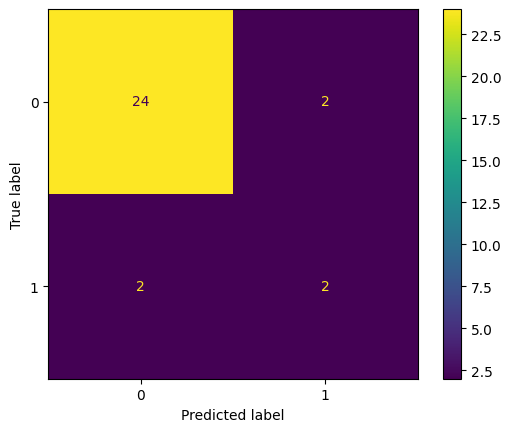

In [ ]:
print_best_result_final(feature_selection_grid)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=70fbdbb3-a702-4c85-bc26-c75e4cfeedbb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>